In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from plotting_tempelate import plot_scaling_lines
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

In [2]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['OPT', 'MP_ASP', 'MP_APST4', 'IT']

In [3]:
def plot_for_traffic(traffic_pattern, _methods, _x_power:int = 1, _legends: list = None, y_log: bool=False):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={method: [] for method in _methods}
    for method in _methods:
        for v in _V:
            _values = raw_data[method][(raw_data[method]['V']==v) & (raw_data[method]['traffic_pattern']==traffic_pattern)]['_time'].values
            if len(_values):
                plot_data[method].append( _values[0] )
    plot_scaling_lines(_V, plot_data, 
                       "scaling of Nexullance methods \n with "+traffic_pattern + " traffic demand", 
                       "R^"+ r"$\bf{" + str(_x_power) + "}$", "computing time (s)", y_log, _x_power, y_max=0, legends=_legends, legend_cols=4, markers=['o', 'v', '^', '<'])

In [5]:
# calculate time for each method, including init, 
# the result shows that the trend is the same

raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
raw_data['IT']['_time'] = raw_data['IT']['time[s]']

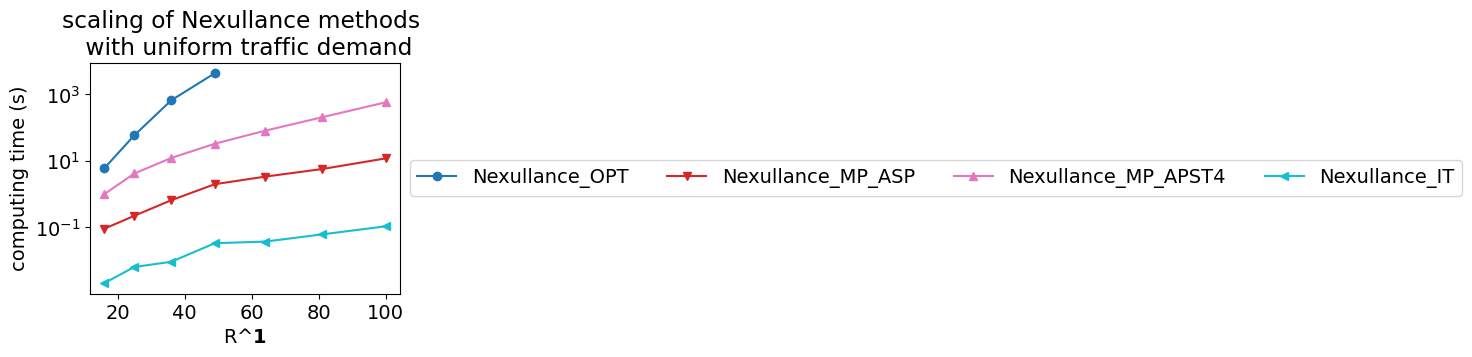

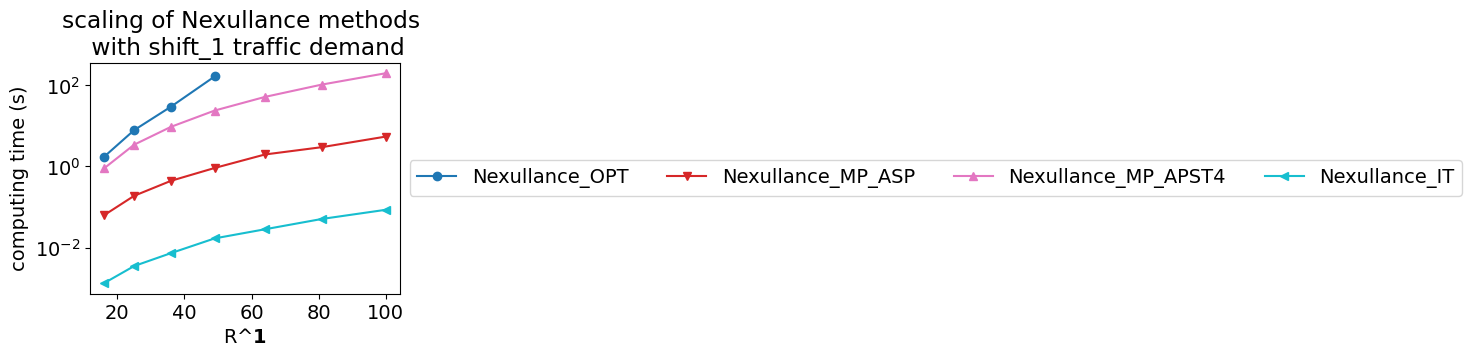

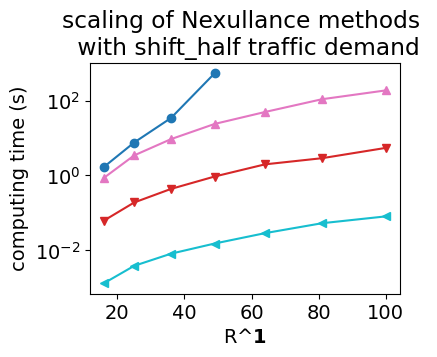

In [6]:
plot_for_traffic("uniform", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'], y_log=True)
plt.show()
plot_for_traffic("shift_1", methods, _legends=['Nexullance_OPT', 'Nexullance_MP_ASP', 'Nexullance_MP_APST4', 'Nexullance_IT'], y_log=True)
plt.show()
plot_for_traffic("shift_half", methods, _legends=None, y_log=True)
plt.show()

In [7]:
def plot_for_method(_method, _traffics, _x_power:int = 1, _legends: list = None, y_log: bool=False):
    _V = [ 16,  25,  36,  49,  64,  81, 100]
    plot_data={traffic: [] for traffic in _traffics}
    for traffic in _traffics:
        for v in _V:
            _values = raw_data[_method][(raw_data[_method]['V']==v) & (raw_data[_method]['traffic_pattern']==traffic)]['_time'].values
            if len(_values):
                plot_data[traffic].append( _values[0] )
    plot_scaling_lines(_V, plot_data, 
                       f"scaling of \n Nexullance_{_method} method", 
                       "R^"+ r"$\bf{" + str(_x_power) + "}$", "computing time (s)", y_log, _x_power, y_max=0, legends=_legends, markers=['o', 'v', '^'])

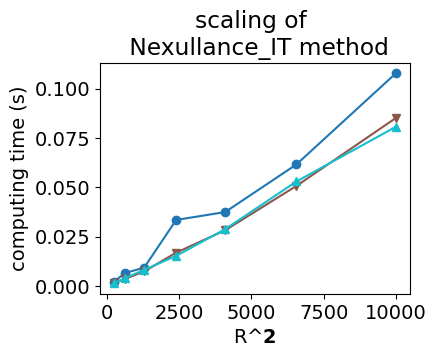

In [8]:
plot_for_method("IT", ["uniform", "shift_1", "shift_half"], _x_power=2, _legends=None, y_log=False)
plt.show()


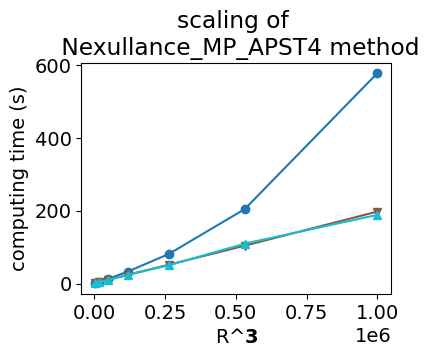

In [9]:
plot_for_method("MP_APST4", ["uniform", "shift_1", "shift_half"], _x_power=3, _legends=None, y_log=False)
plt.show()


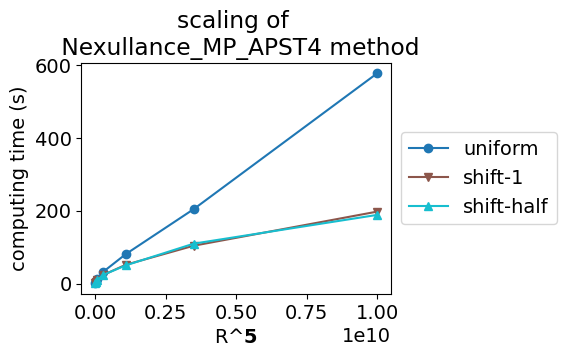

In [10]:
plot_for_method("MP_APST4", ["uniform", "shift_1", "shift_half"], _x_power=5, _legends=["uniform", "shift-1", "shift-half"], y_log=False)
plt.show()
